In [43]:
import xarray as xr
import pandas as pd

# Define paths for future datasets
future_paths = {
    'mean_rp1': '2021-2050/future_waterlevel_actual-value_2021-2050_rp1_ensemble-mean_best-fit_v1.nc',
    'std_rp1': '2021-2050/future_waterlevel_actual-value_2021-2050_rp1_ensemble-std_best-fit_v1.nc',
    'mean_rp10': '2021-2050/future_waterlevel_actual-value_2021-2050_rp10_ensemble-mean_best-fit_v1.nc',
    'std_rp10': '2021-2050/future_waterlevel_actual-value_2021-2050_rp10_ensemble-std_best-fit_v1.nc'
}

# Load future datasets
future_datasets = {key: xr.open_dataset(path) for key, path in future_paths.items()}

# Convert future datasets to DataFrames
future_dfs = {key: ds.to_dataframe().reset_index() for key, ds in future_datasets.items()}

# Define paths for historical datasets
historical_paths = {
    'mean_rp1': '1951-1980/historical_waterlevel_actual-value_1951-1980_rp1_ensemble-mean_best-fit_v1.nc',
    'std_rp1': '1951-1980/historical_waterlevel_actual-value_1951-1980_rp1_ensemble-std_best-fit_v1.nc',
    'mean_rp10': '1951-1980/historical_waterlevel_actual-value_1951-1980_rp10_ensemble-mean_best-fit_v1.nc',
    'std_rp10': '1951-1980/historical_waterlevel_actual-value_1951-1980_rp10_ensemble-std_best-fit_v1.nc'
}

# Load historical datasets
historical_datasets = {key: xr.open_dataset(path) for key, path in historical_paths.items()}

# Convert historical datasets to DataFrames
historical_dfs = {key: ds.to_dataframe().reset_index() for key, ds in historical_datasets.items()}




In [44]:
# Calculate the difference between future and historical water levels for the same return period
# Ensure that the data structures align; this may require additional steps if they do not
df_difference_rp10 = future_dfs['mean_rp10']['ensemble_mean_waterlevel'] - historical_dfs['mean_rp10']['ensemble_mean_waterlevel']

# Add the differences as a new column in the DataFrame
df_ensemble_mean_rp10 = future_dfs['mean_rp10']
df_ensemble_mean_rp10['waterlevel_difference'] = df_difference_rp10


In [45]:
df_ensemble_mean_rp10.head()

,stations,ensemble_mean_waterlevel,station_y_coordinate,station_x_coordinate,waterlevel_difference
0,0,0.342,34.827,24.089,-0.036
1,1,0.341,34.871,24.089,-0.041
2,2,0.390,35.369,26.902,-0.028
3,3,0.382,35.398,26.887,-0.038
4,4,0.376,35.427,26.960,-0.040


In [46]:
path_HAT_f = '2021-2050/future_tide_actual-value_2021-2050_HAT_v1.nc'
ds_HAT_f = xr.open_dataset(path_HAT_f)
df_HAT_f = ds_HAT_f.to_dataframe().reset_index()

path_HAT_p = '1951-1980/historical_tide_actual-value_1951-1980_HAT_v1.nc'
ds_HAT_p = xr.open_dataset(path_HAT_p)
df_HAT_p = ds_HAT_p.to_dataframe().reset_index()

In [47]:
df_HAT_f.head()

,stations,time,station_x_coordinate,station_y_coordinate,HAT
0,0,2021-01-01,24.089,34.827,0.066
1,1,2021-01-01,24.089,34.871,0.061
2,2,2021-01-01,26.902,35.369,0.120
3,3,2021-01-01,26.887,35.398,0.106
4,4,2021-01-01,26.960,35.427,0.103


In [48]:
# calculate the difference between future and historical HAT
df_HAT_f['HAT_difference'] = df_HAT_f['HAT'] - df_HAT_p['HAT']

In [49]:
df_HAT_f.head()

,stations,time,station_x_coordinate,station_y_coordinate,HAT,HAT_difference
0,0,2021-01-01,24.089,34.827,0.066,0.000
1,1,2021-01-01,24.089,34.871,0.061,0.000
2,2,2021-01-01,26.902,35.369,0.120,0.002
3,3,2021-01-01,26.887,35.398,0.106,0.000
4,4,2021-01-01,26.960,35.427,0.103,0.001


In [50]:
import pandas as pd

# Assuming df_ensemble_mean_rp10 and df_HAT_f are your two dataframes and they've been properly loaded

# Merge the dataframes on their common station coordinates
combined_df = pd.merge(df_ensemble_mean_rp10, df_HAT_f,  on=['station_x_coordinate', 'station_y_coordinate'])

# You can now calculate additional columns as needed, for example:
# combined_df['Total_Water_Level_Change'] = combined_df['waterlevel_difference'] + combined_df['HAT_difference']

# Now you can proceed with plotting this combined dataframe


In [51]:
combined_df.head()

,stations_x,ensemble_mean_waterlevel,station_y_coordinate,station_x_coordinate,waterlevel_difference,stations_y,time,HAT,HAT_difference
0,2,0.390,35.369,26.902,-0.028,2,2021-01-01,0.120,0.002
1,3,0.382,35.398,26.887,-0.038,3,2021-01-01,0.106,0.000
2,4,0.376,35.427,26.960,-0.040,4,2021-01-01,0.103,0.001
3,6,0.390,35.383,26.946,-0.028,6,2021-01-01,0.120,0.001
4,7,0.444,35.500,12.576,-0.028,7,2021-01-01,0.196,0.003


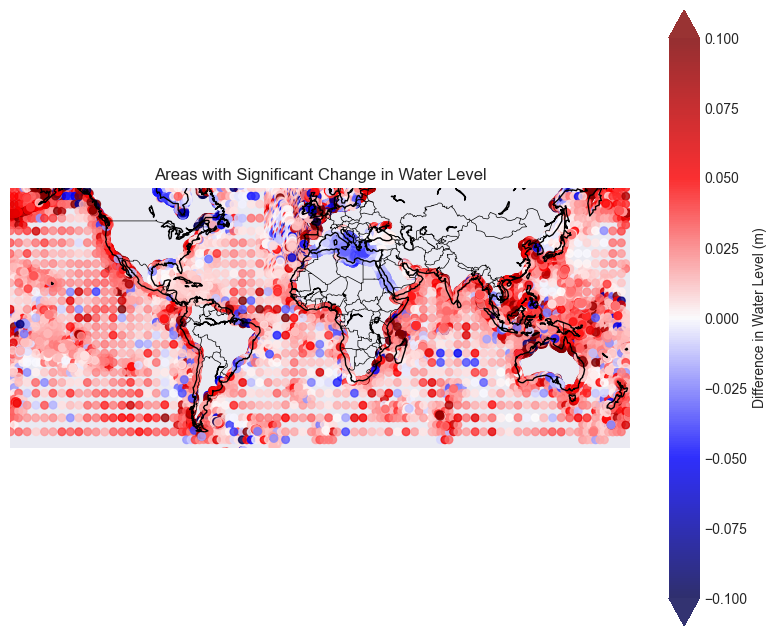

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

# Assuming df_ensemble_mean_rp1 is the DataFrame with the differences
# and 'station_x_coordinate', 'station_y_coordinate' are the columns with coordinates
# Set the color scale bounds
vmin, vmax = -0.1, 0.1

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter, adjust alpha if needed to make the plot clearer
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=30, cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)

# Add a colorbar
cb = plt.colorbar(sc, extend='both')
cb.set_label('Difference in Water Level (m)')

# Show the plot
plt.title('Areas with Significant Change in Water Level')
plt.show()


C:\Users\E\AppData\Local\Temp\ipykernel_21396\1224985569.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


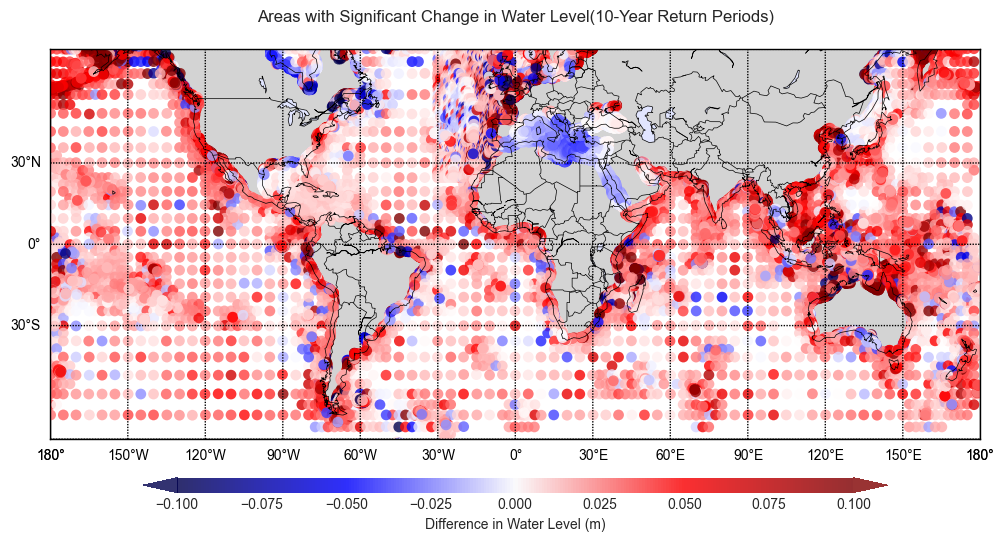

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

# Assuming df_ensemble_mean_rp10 is the DataFrame with the differences
# and 'station_x_coordinate', 'station_y_coordinate' are the columns with coordinates

# Set the color scale bounds
vmin, vmax = -0.1, 0.1

# Create a new figure
plt.figure(figsize=(12, 10))

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines, country borders, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='#E1E5FF')

# Draw map boundaries and meridians and parallels grid
m.drawmapboundary(fill_color='#FFFFFF')
m.drawmeridians(np.arange(-180., 181., 30.), labels=[False, False, False, True])
m.drawparallels(np.arange(-90., 91., 30.), labels=[True, False, False, False])

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter, adjust alpha if needed to make the plot clearer
# sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=50, cmap='seismic', alpha=0.9, vmin=vmin, vmax=vmax, edgecolor='k', linewidth=0.1)

# Plot using scatter with lower alpha for transparency and soft edge color for clarity
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=60, cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax, edgecolor='none', linewidth=0)


# Add a horizontal colorbar
cb = plt.colorbar(sc, extend='both', orientation='horizontal', pad=0.05, aspect=50, shrink=0.8)
cb.set_label('Difference in Water Level (m)')

# Add a title with some padding for aesthetics
plt.title('Areas with Significant Change in Water Level(10-Year Return Periods)', pad=20)

# Show the plot
plt.show()


C:\Users\E\AppData\Local\Temp\ipykernel_21396\866823211.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


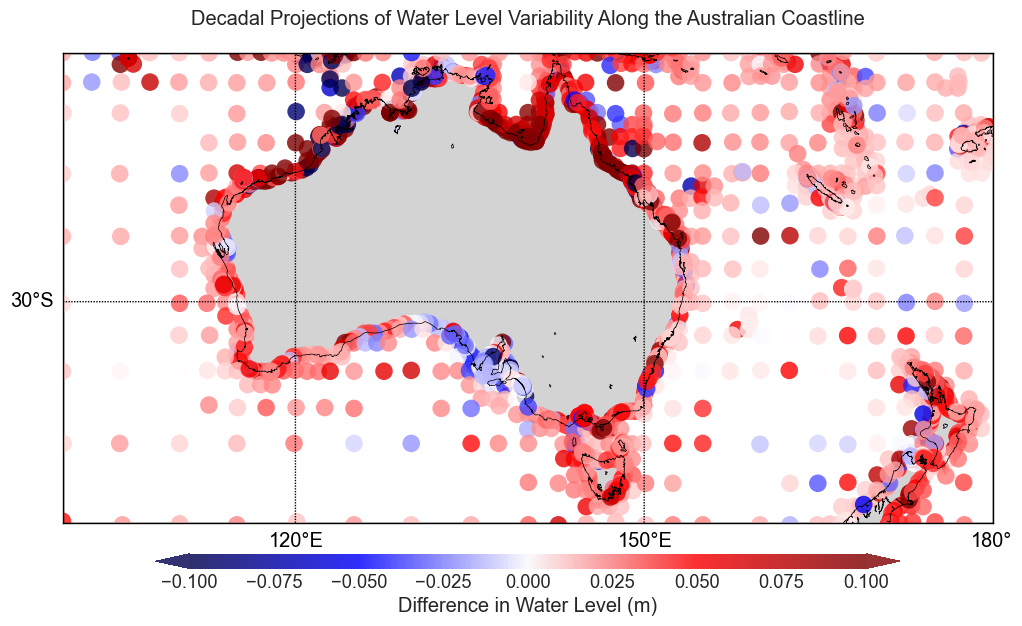

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

# Assuming df_ensemble_mean_rp10 is the DataFrame with the differences
# and 'station_x_coordinate', 'station_y_coordinate' are the columns with coordinates

# Set the color scale bounds
vmin, vmax = -0.1, 0.1

# Latitude and longitude boundaries for Australia
lat_min, lat_max = -45, -10
lon_min, lon_max = 100, 180

# Create a new figure
plt.figure(figsize=(12, 8))

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a Basemap instance
# Create a Basemap instance zoomed in on Australia
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, 
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i')

# Draw coastlines, country borders, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='#E1E5FF')

# Draw map boundaries and meridians and parallels grid
m.drawmapboundary(fill_color='#FFFFFF')
m.drawmeridians(np.arange(-180., 181., 30.), labels=[False, False, False, True])
m.drawparallels(np.arange(-90., 91., 30.), labels=[True, False, False, False])

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter, adjust alpha if needed to make the plot clearer
# sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=50, cmap='seismic', alpha=0.9, vmin=vmin, vmax=vmax, edgecolor='k', linewidth=0.1)

# Plot using scatter with lower alpha for transparency and soft edge color for clarity
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=160, cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax, edgecolor='none', linewidth=0)


# Add a horizontal colorbar
cb = plt.colorbar(sc, extend='both', orientation='horizontal', pad=0.05, aspect=50, shrink=0.8)
cb.set_label('Difference in Water Level (m)')

# Add a title with some padding for aesthetics
plt.title('Decadal Projections of Water Level Variability Along the Australian Coastline', pad=20)


# Show the plot
plt.show()


In [99]:
df_ensemble_mean_rp10.head()

,stations,ensemble_mean_waterlevel,station_y_coordinate,station_x_coordinate,waterlevel_difference
0,0,0.342,34.827,24.089,-0.036
1,1,0.341,34.871,24.089,-0.041
2,2,0.390,35.369,26.902,-0.028
3,3,0.382,35.398,26.887,-0.038
4,4,0.376,35.427,26.960,-0.040


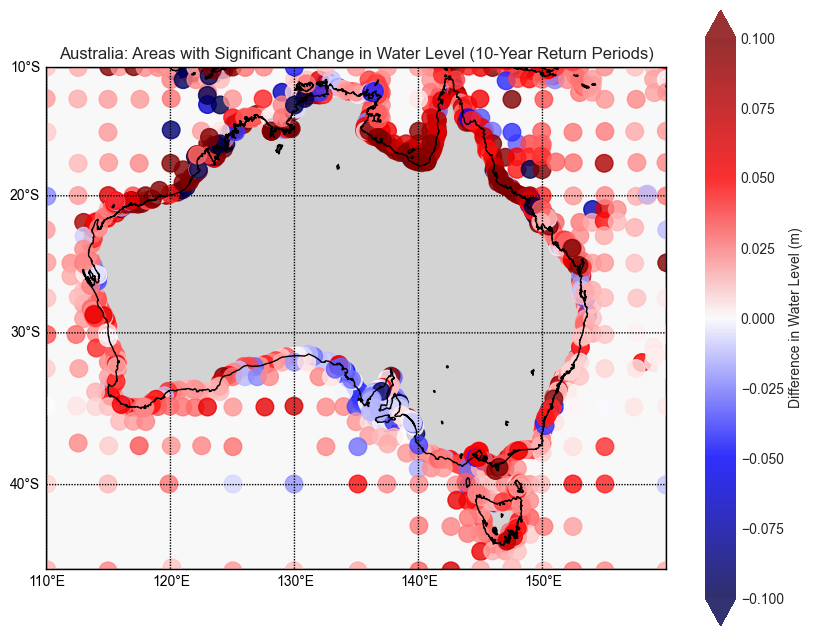

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

# Set the color scale bounds
vmin, vmax = -0.1, 0.1

# Latitude and longitude boundaries for Australia
lat_min, lat_max = -45, -10
lon_min, lon_max = 110, 160

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap instance zoomed in on Australia
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, 
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i')

# Draw coastlines, map boundary, and fill continents
m.drawcoastlines()
m.drawmapboundary(fill_color='#F8F8F8')
m.fillcontinents(color='lightgray', lake_color='#3E5678')

# Draw parallels and meridians
m.drawparallels(np.arange(-50., -5., 10.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(110., 160., 10.), labels=[0, 0, 0, 1])

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter, adjust alpha if needed to make the plot clearer
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=160, cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)

# Add a colorbar
cb = plt.colorbar(sc, extend='both')
cb.set_label('Difference in Water Level (m)')

# Show the plot with a title
plt.title('Australia')
plt.show()


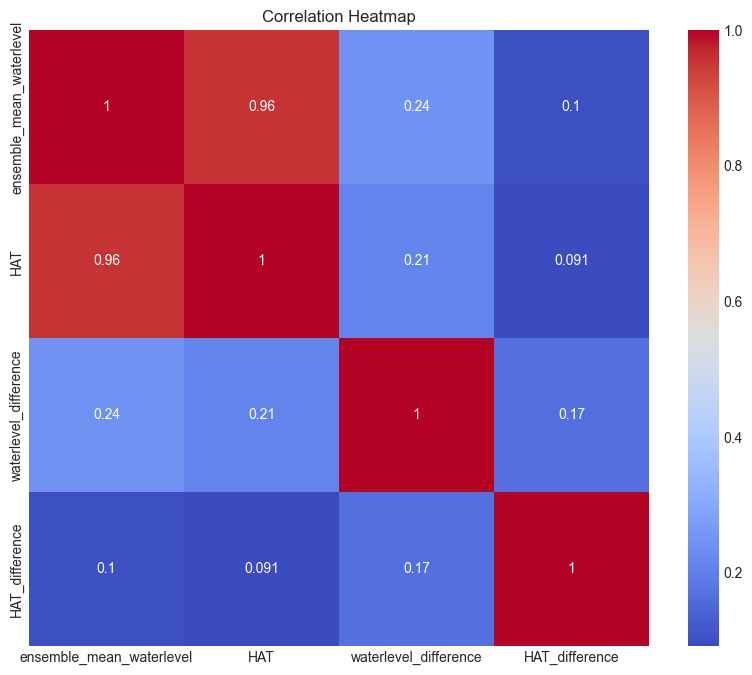

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your combined dataframe is named combined_df
# First, let's convert the 'time' column to datetime just in case it's not already
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[['ensemble_mean_waterlevel', 'HAT', 'waterlevel_difference', 'HAT_difference']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [56]:
# Time-series plot for a specific station (station 2 as an example)
# This requires a time series data. Assuming 'time' is the datetime column.
time_series_data = combined_df[combined_df['stations_x'] == 3]
time_series_data.head()




,stations_x,ensemble_mean_waterlevel,station_y_coordinate,station_x_coordinate,waterlevel_difference,stations_y,time,HAT,HAT_difference
1,3,0.382,35.398,26.887,-0.038,3,2021-01-01,0.106,0.0


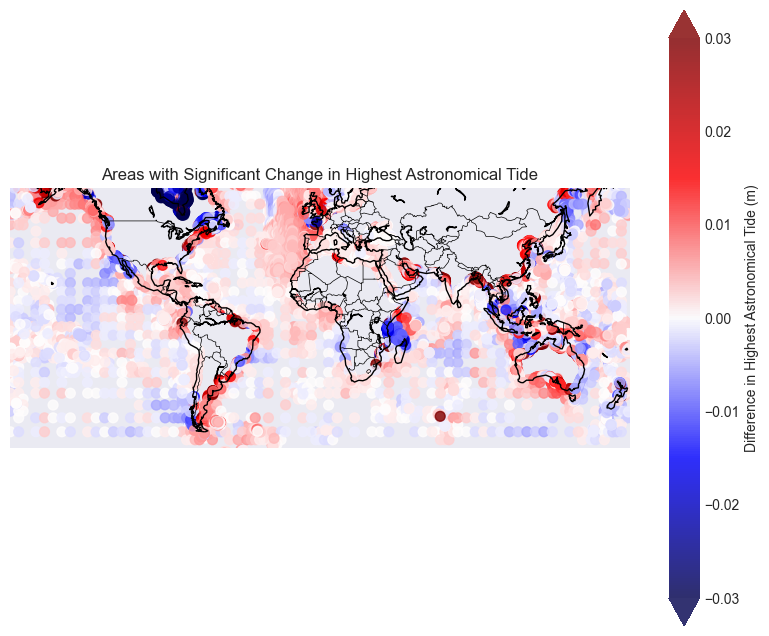

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

# Assuming df_ensemble_mean_rp1 is the DataFrame with the differences
# and 'station_x_coordinate', 'station_y_coordinate' are the columns with coordinates
# Set the color scale bounds
vmin, vmax = -0.03, 0.03

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()


# Convert station coordinates to map projection coordinates
x, y = m(combined_df['station_x_coordinate'].values, combined_df['station_y_coordinate'].values)

# Plot using scatter, adjust alpha if needed to make the plot clearer
sc = m.scatter(x, y, c=combined_df['HAT_difference'], s=50, cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)

# Add a colorbar
cb = plt.colorbar(sc, extend='both')
cb.set_label('Difference in Highest Astronomical Tide (m)')

# Show the plot
plt.title('Areas with Significant Change in Highest Astronomical Tide')
plt.show()


C:\Users\E\AppData\Local\Temp\ipykernel_21396\2114209247.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


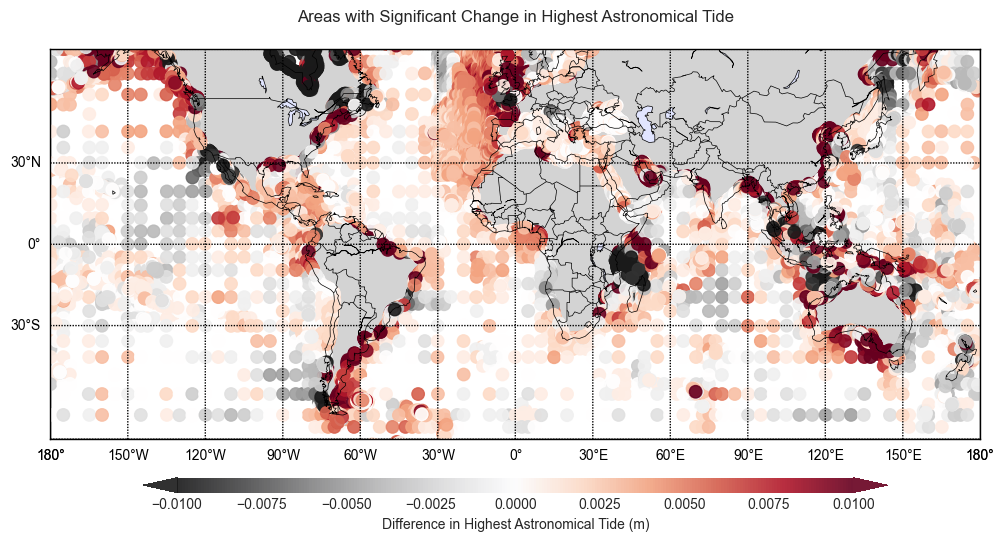

In [75]:
# Set the color scale bounds
vmin, vmax = -0.01, 0.01


# Create a new figure
plt.figure(figsize=(12, 10))

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines, country borders, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='#E1E5FF')

# Draw map boundaries and meridians and parallels grid
m.drawmapboundary(fill_color='#FFFFFF')
m.drawmeridians(np.arange(-180., 181., 30.), labels=[False, False, False, True])
m.drawparallels(np.arange(-90., 91., 30.), labels=[True, False, False, False])

# Convert station coordinates to map projection coordinates
x, y = m(combined_df['station_x_coordinate'].values, combined_df['station_y_coordinate'].values)

# Plot using scatter, adjust alpha if needed to make the plot clearer
sc = m.scatter(x, y, c=combined_df['HAT_difference'], s=80, cmap='RdGy_r', alpha=0.9, vmin=vmin, vmax=vmax)

# Add a colorbar
cb = plt.colorbar(sc, extend='both', orientation='horizontal', pad=0.05, aspect=50, shrink=0.8)
cb.set_label('Difference in Highest Astronomical Tide (m)')

# Show the plot
plt.title('Areas with Significant Change in Highest Astronomical Tide', pad=20)
plt.show()


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

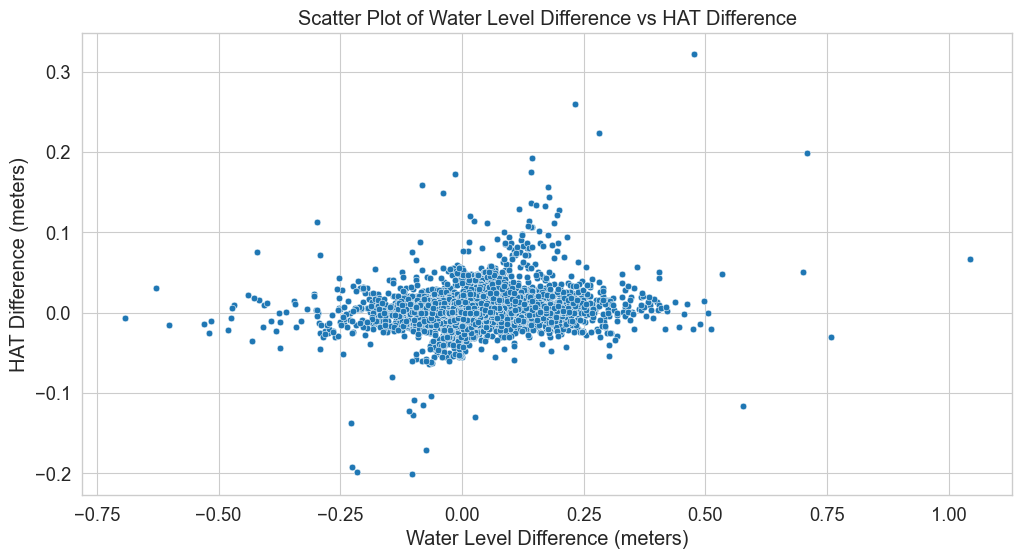

In [94]:
# Scatter plot to show relationship between water level difference and HAT difference
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_df, x='waterlevel_difference', y='HAT_difference')
plt.xlabel('Water Level Difference (meters)')
plt.ylabel('HAT Difference (meters)')
plt.title('Scatter Plot of Water Level Difference vs HAT Difference')
plt.show()

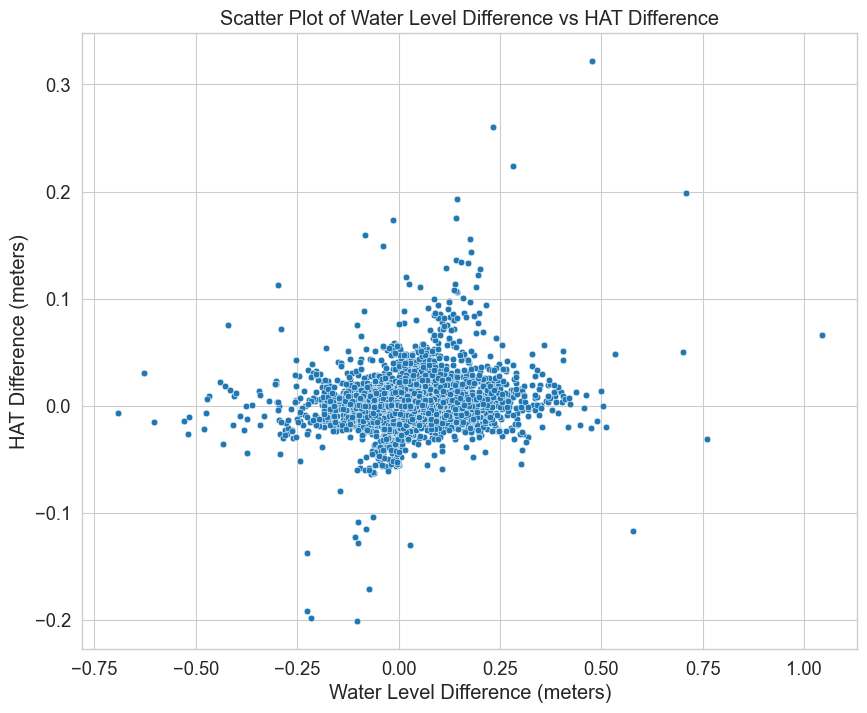

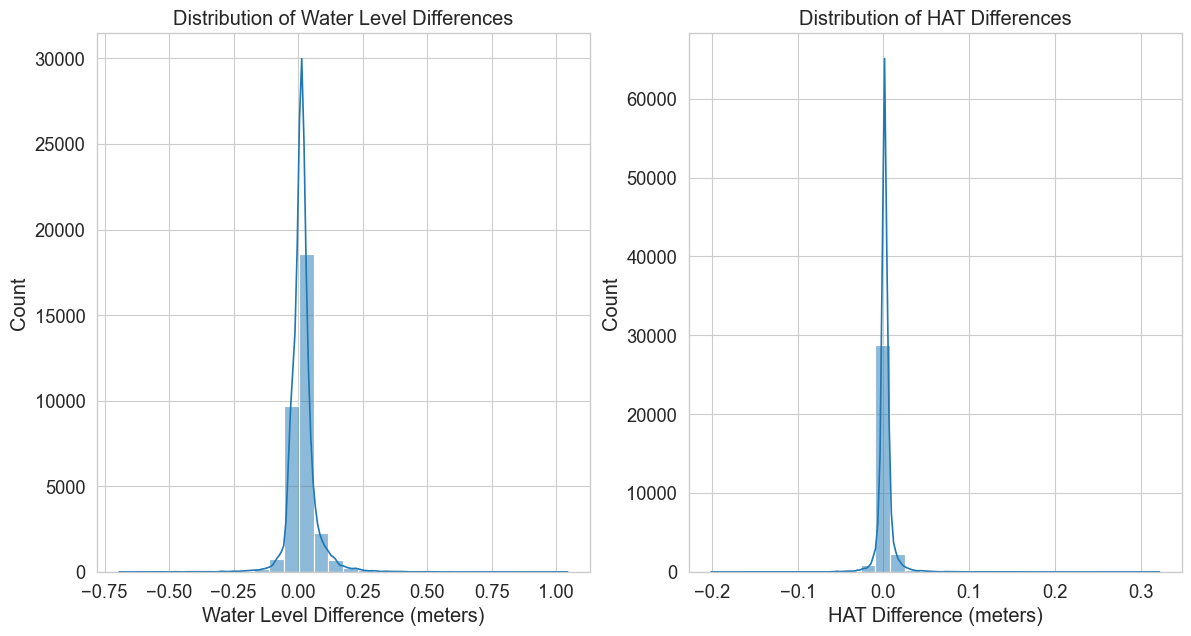

In [83]:



# Scatter plot to show relationship between water level difference and HAT difference
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='waterlevel_difference', y='HAT_difference')
plt.xlabel('Water Level Difference (meters)')
plt.ylabel('HAT Difference (meters)')
plt.title('Scatter Plot of Water Level Difference vs HAT Difference')
plt.show()

# Histograms of water level differences and HAT differences
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(combined_df['waterlevel_difference'], bins=30, kde=True)
plt.title('Distribution of Water Level Differences')
plt.xlabel('Water Level Difference (meters)')

plt.subplot(1, 2, 2)
sns.histplot(combined_df['HAT_difference'], bins=30, kde=True)
plt.title('Distribution of HAT Differences')
plt.xlabel('HAT Difference (meters)')
plt.show()


From this scatter plot, several insights can be gleaned:

1. **Distribution and Spread:**
   - There is a concentration of data points around the center, indicating that for most observations, the differences in water level and HAT are relatively small. However, there is a spread towards the right side, suggesting that there are instances where the water level difference is larger.

2. **Possible Correlation:**
   - At first glance, there doesn’t appear to be a clear linear relationship between water level differences and HAT differences. If these two variables were strongly and linearly correlated, we would expect to see the data points forming a distinct line or curve. Instead, the points seem to be more dispersed.

3. **Presence of Outliers:**
   - There are a few outliers, particularly in the water level difference where some values are much higher than the rest. This could indicate locations that are experiencing significantly different conditions than the majority of the observed areas.

4. **Range of Changes:**
   - The HAT differences range from slightly negative to just above 0.3 meters, while the water level differences range more widely, up to around 1 meter. This suggests that the variability in water level differences is greater than that of HAT differences.

5. **Implications for Coastal Management:**
   - For coastal management, this plot suggests that while extreme tidal events (as represented by HAT differences) are a concern, the general water level changes might present a broader range of variability and potentially a different set of challenges.

6. **Need for Further Analysis:**
   - The plot indicates that it would be useful to conduct further statistical analysis to quantify the relationship between these variables. This might include computing correlation coefficients or fitting a regression model to the data.

The practical implication of this plot is that it serves as an exploratory tool to understand the relationship between average water level changes and extreme tidal events. For policymakers and planners, the plot underlines the importance of considering both average changes and extreme events in their strategies, as both can have significant implications for flood risk and coastal ecosystem management.

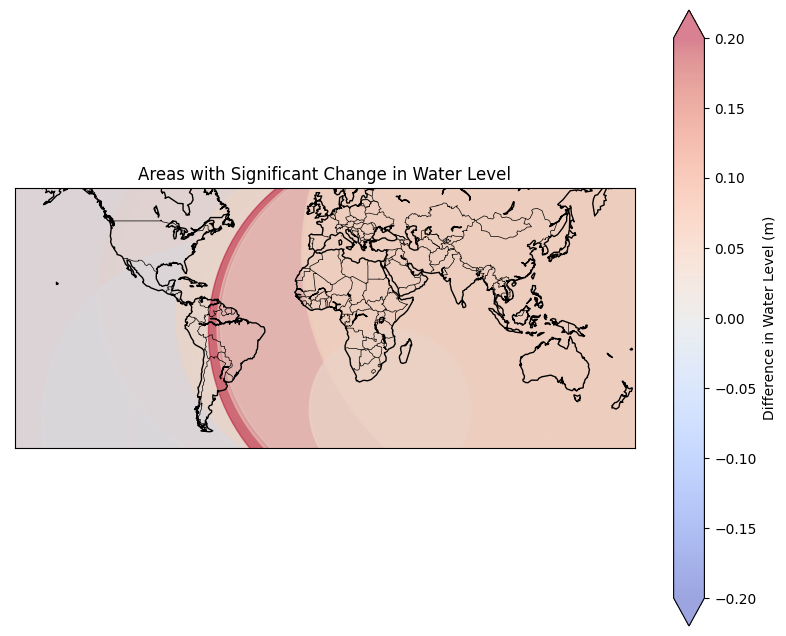

In [31]:
from scipy.stats import gaussian_kde

# Assuming df_ensemble_mean_rp10 is the DataFrame with the differences
# and 'station_x_coordinate', 'station_y_coordinate' are the columns with coordinates

# Set the color scale bounds
vmin, vmax = -0.2, 0.2

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Calculate point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Scale the sizes by a factor to make them visible on the plot
# Here, 'z' is multiplied by a large factor as an example; adjust as necessary for your dataset
scatter_size = z * 1000000 / z.max()

# Plot using scatter, adjust alpha if needed to make the plot clearer
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['waterlevel_difference'], s=scatter_size, cmap='coolwarm', alpha=0.5, vmin=vmin, vmax=vmax)

# Add a colorbar with the extend option to indicate that the data extends beyond the bounds set by vmin and vmax
cb = plt.colorbar(sc, extend='both')
cb.set_label('Difference in Water Level (m)')

# Set the colormap so that higher values are red and lower values are blue
sc.set_cmap('coolwarm')

# Show the plot
plt.title('Areas with Significant Change in Water Level')
plt.show()
